# Machine Learning: Bicycle rentals

The goal of this project is to build a machine learning app that can help estimate the number of users per day based on a number of meteriological data. This

In this notebook, we will perform some feature engineering to be able to train an adequqte model.

#### Introducing the dataset

The dataset consists of  columns:

- Datetime: hourly date + timestamp 
- Seasons: {1 = spring, 2 = summer, 3 = fall, 4 = winter}
-  Holiday - whether the day is considered a holiday
- Workingday - whether the day is neither a weekend nor holiday
- Weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- Temp - temperature in Celsius
- Atemp - "feels like" temperature in Celsius
- Humidity - relative humidity
- Windspeed - wind speed
- Casual - number of non-registered user rentals initiated
- Registered - number of registered user rentals initiated
- Count - number of total rentals

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


## Preliminary data exploration

### Understanding the data

First, I need to understand the contents of the dataset, that means:
- Knowing what data types are in the columns.
- Finding missing values.
- Converting datatypes, etc.

In [5]:
for i in df.columns:
    print(i)
    print(df[i].dtypes)
    print(df[i].nunique())

datetime
object
10886
season
int64
4
holiday
int64
2
workingday
int64
2
weather
int64
4
temp
float64
49
atemp
float64
60
humidity
int64
89
windspeed
float64
28
casual
int64
309
registered
int64
731
count
int64
822


In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [7]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [8]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day

In [9]:
test_df=df[9063:]

In [10]:
test_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day
9063,2012-09-01 00:00:00,3,0,0,1,30.34,34.090,62,7.0015,22,146,168,2012,9,1
9064,2012-09-01 01:00:00,3,0,0,1,29.52,34.850,74,8.9981,11,68,79,2012,9,1
9065,2012-09-01 02:00:00,3,0,0,1,28.70,32.575,70,11.0014,8,61,69,2012,9,1
9066,2012-09-01 03:00:00,3,0,0,1,28.70,32.575,70,7.0015,6,29,35,2012,9,1
9067,2012-09-01 04:00:00,3,0,0,1,28.70,32.575,70,0.0000,3,9,12,2012,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19


In [11]:
train_df = df[:9063]

In [12]:
train_df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day
9058,2012-08-19 19:00:00,3,0,0,2,26.24,30.305,73,8.9981,72,269,341,2012,8,19
9059,2012-08-19 20:00:00,3,0,0,2,26.24,30.305,73,12.9980,61,213,274,2012,8,19
9060,2012-08-19 21:00:00,3,0,0,3,25.42,29.545,78,6.0032,36,154,190,2012,8,19
9061,2012-08-19 22:00:00,3,0,0,2,25.42,29.545,78,11.0014,6,50,56,2012,8,19
9062,2012-08-19 23:00:00,3,0,0,2,25.42,29.545,73,0.0000,7,39,46,2012,8,19


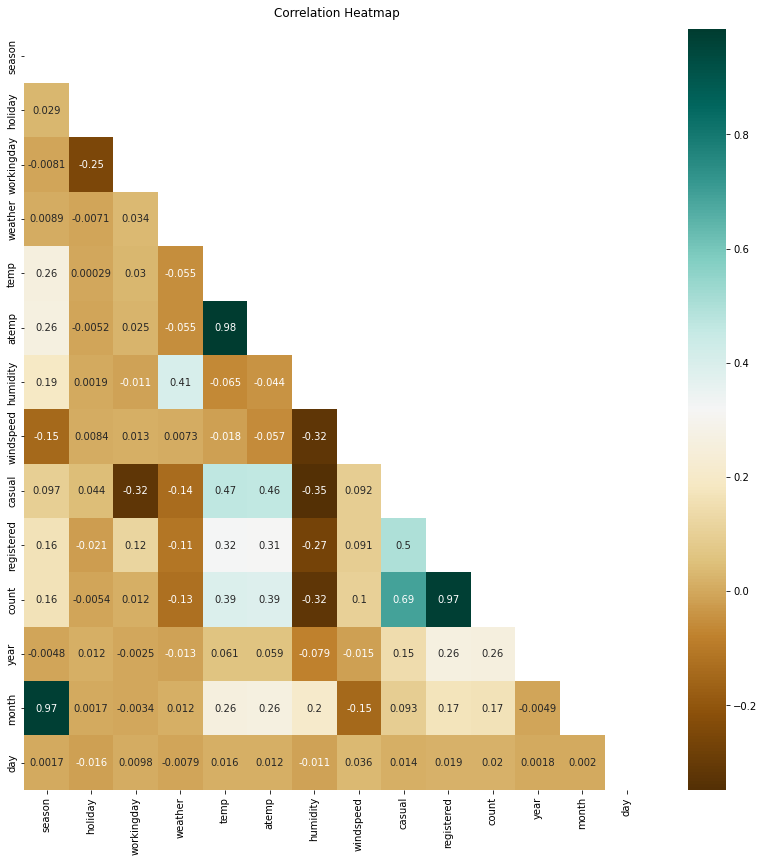

In [13]:
plt.figure(figsize=(14,14))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), annot = True, mask = mask, cmap = 'BrBG')
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize':12}, pad=12);


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
train_df.drop(columns=['casual', 'registered'], inplace=True)

/tmp/ipykernel_244902/775993782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(columns=['casual', 'registered'], inplace=True)


In [16]:
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9058,2012-08-19 19:00:00,3,0,0,2,26.24,30.305,73,8.9981,341,2012,8,19
9059,2012-08-19 20:00:00,3,0,0,2,26.24,30.305,73,12.9980,274,2012,8,19
9060,2012-08-19 21:00:00,3,0,0,3,25.42,29.545,78,6.0032,190,2012,8,19
9061,2012-08-19 22:00:00,3,0,0,2,25.42,29.545,78,11.0014,56,2012,8,19


In [17]:
columns = train_df.columns.to_list()

In [18]:
columns

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'count',
 'year',
 'month',
 'day']

In [19]:
to_be_removed = ['datetime','season','holiday','workingday','weather','count','year','month','day']

for i in to_be_removed:
    columns.remove(i)

<Figure size 1008x1008 with 0 Axes>

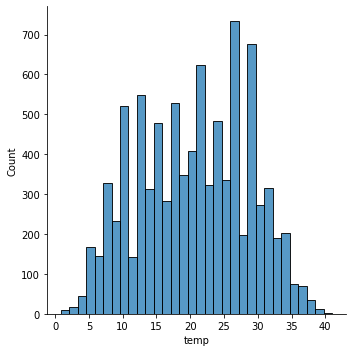

<Figure size 1008x1008 with 0 Axes>

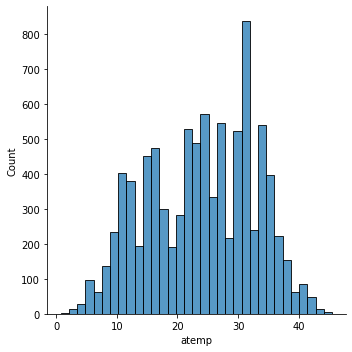

<Figure size 1008x1008 with 0 Axes>

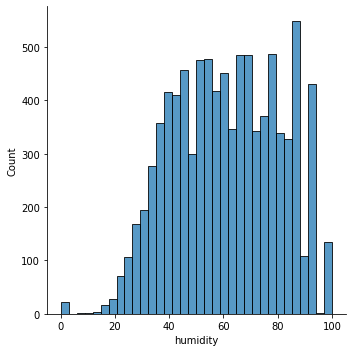

<Figure size 1008x1008 with 0 Axes>

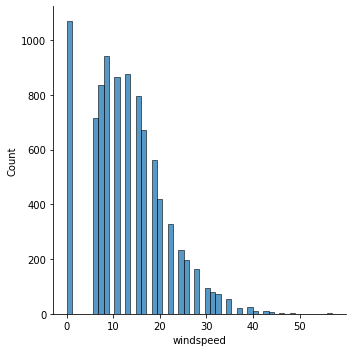

In [20]:

for column in columns:
    plt.figure(figsize=(14,14));
    sns.displot(train_df[column])

In [21]:
# train_df.to_csv(r'../vlib_ml_app/train_df.csv')
# test_df.to_csv(r'../vlib_ml_app/test_df.csv')

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [23]:
max_scaler = MinMaxScaler()
standard = StandardScaler()

/tmp/ipykernel_244902/4058764584.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[max_col] = max_scaler.fit_transform(train_df[column].to_numpy().reshape(-1,1))
/tmp/ipykernel_244902/4058764584.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[scaled_col] = standard.fit_transform(train_df[column].to_numpy().reshape(-1,1))
/tmp/ipykernel_244902/4058764584.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

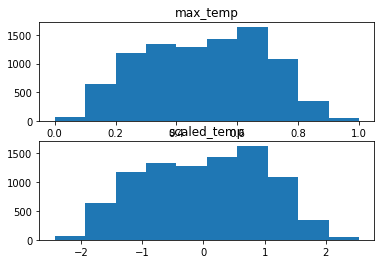

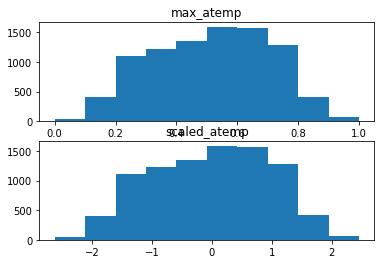

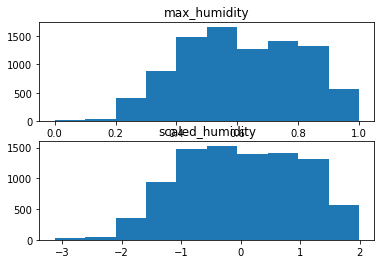

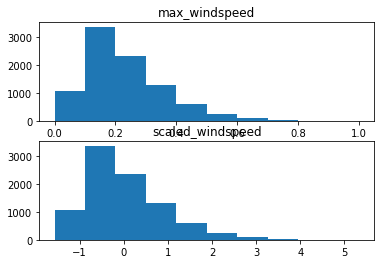

In [24]:
for column in columns:
    scaled_col = "scaled_"+column
    max_col = 'max_'+column
    train_df[max_col] = max_scaler.fit_transform(train_df[column].to_numpy().reshape(-1,1))
    train_df[scaled_col] = standard.fit_transform(train_df[column].to_numpy().reshape(-1,1))
    
    fig = plt.figure()
    ax1 = fig.add_subplot(2, 1, 1)
    ax2 = fig.add_subplot(2, 1, 2)  
    
    n, bins, patches = ax1.hist(train_df[max_col]);
    ax1.set_title(max_col)
    n, bins, patches = ax2.hist(train_df[scaled_col]);
    ax2.set_title(scaled_col)
    

In [25]:
train_df.drop(['max_temp','scaled_temp','max_atemp','scaled_atemp','max_humidity','scaled_humidity','max_windspeed','scaled_windspeed'], inplace=True, axis=1)

/tmp/ipykernel_244902/4026218496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(['max_temp','scaled_temp','max_atemp','scaled_atemp','max_humidity','scaled_humidity','max_windspeed','scaled_windspeed'], inplace=True, axis=1)


In [26]:
from sklearn.preprocessing import QuantileTransformer
quantile = QuantileTransformer(output_distribution='normal')
train_df['new_windspeed']= quantile.fit_transform(train_df['windspeed'].to_numpy().reshape(-1,1))


/tmp/ipykernel_244902/1782725309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['new_windspeed']= quantile.fit_transform(train_df['windspeed'].to_numpy().reshape(-1,1))


<Figure size 432x288 with 0 Axes>

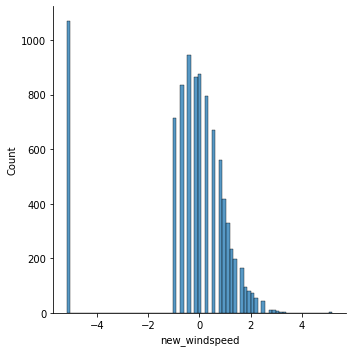

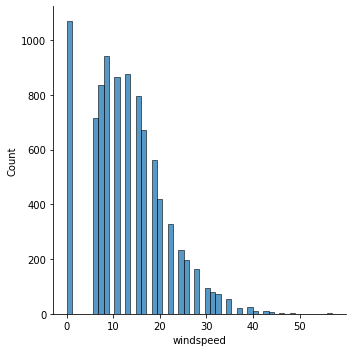

In [27]:
plt.figure()
sns.displot(train_df['new_windspeed'])
sns.displot(train_df['windspeed'])

In [28]:
train_df['scaled_temp'] = standard.fit_transform(train_df['temp'].to_numpy().reshape(-1,1))

/tmp/ipykernel_244902/2070367563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['scaled_temp'] = standard.fit_transform(train_df['temp'].to_numpy().reshape(-1,1))


<Figure size 432x288 with 0 Axes>

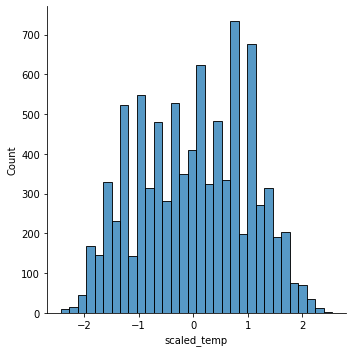

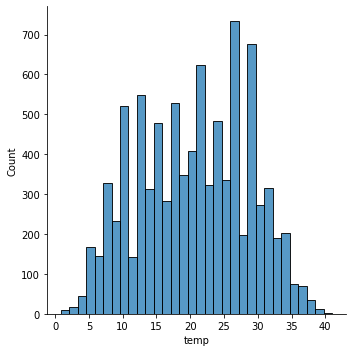

In [29]:
plt.figure()
sns.displot(train_df['scaled_temp'])
sns.displot(train_df['temp'])

/tmp/ipykernel_244902/3063149853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['scaled_atemp'] = standard.fit_transform(train_df['atemp'].to_numpy().reshape(-1,1))


<Figure size 432x288 with 0 Axes>

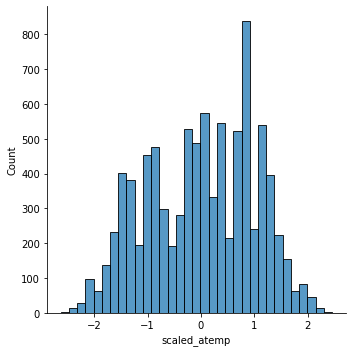

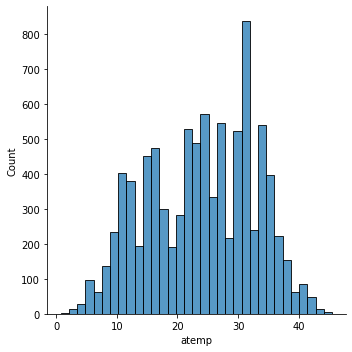

In [30]:
train_df['scaled_atemp'] = standard.fit_transform(train_df['atemp'].to_numpy().reshape(-1,1))
plt.figure()
sns.displot(train_df['scaled_atemp'])
sns.displot(train_df['atemp'])

/tmp/ipykernel_244902/1268912682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['scaled_atemp'] = standard.fit_transform(train_df['atemp'].to_numpy().reshape(-1,1))


<Figure size 432x288 with 0 Axes>

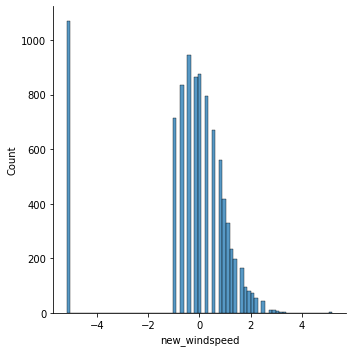

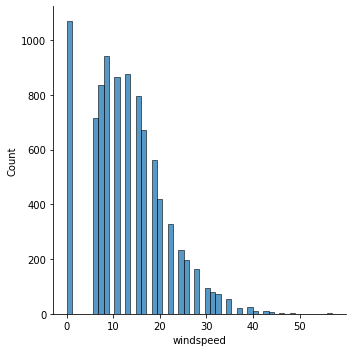

In [31]:
train_df['scaled_atemp'] = standard.fit_transform(train_df['atemp'].to_numpy().reshape(-1,1))
plt.figure()
sns.displot(train_df['new_windspeed'])
sns.displot(train_df['windspeed'])

In [32]:
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,new_windspeed,scaled_temp,scaled_atemp
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,-5.199338,-1.313694,-1.076623
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,-5.199338,-1.415185,-1.163110
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,-5.199338,-1.415185,-1.163110
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,-5.199338,-1.313694,-1.076623
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,-5.199338,-1.313694,-1.076623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9058,2012-08-19 19:00:00,3,0,0,2,26.24,30.305,73,8.9981,341,2012,8,19,-0.410169,0.716125,0.733913
9059,2012-08-19 20:00:00,3,0,0,2,26.24,30.305,73,12.9980,274,2012,8,19,0.023839,0.716125,0.733913
9060,2012-08-19 21:00:00,3,0,0,3,25.42,29.545,78,6.0032,190,2012,8,19,-1.006211,0.614635,0.647426
9061,2012-08-19 22:00:00,3,0,0,2,25.42,29.545,78,11.0014,56,2012,8,19,-0.147316,0.614635,0.647426


In [33]:
q_columns = ['windspeed']
standard_columns = ['temp','atemp','weather', 'humidity']
categorical_columns = ['season','holiday','workingday', 'month', 'day', 'year']

In [34]:
train_df.drop(columns=['new_windspeed','scaled_temp','scaled_atemp'], inplace=True);

/tmp/ipykernel_244902/2688587884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(columns=['new_windspeed','scaled_temp','scaled_atemp'], inplace=True);


In [35]:
params = {
    'model__boosting_type': 'gbdt',
    'model__objective': 'regression',
    'model__metric': 'r2_score',
    'model__max_depth': 6, 
    'model__learning_rate': 0.1,
    'model__verbose': 0, 
    'model__early_stopping_round': 20}
n_estimators = 100
    


In [52]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

processor = ColumnTransformer([
    ('quantile', quantile, q_columns),
    ('standard', standard, standard_columns),
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
], remainder='passthrough')
model = LGBMRegressor()

ltb_pipe = Pipeline([('preprocess', processor),('model',model)])


In [53]:
ltb_pipe.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('quantile',
                                                  QuantileTransformer(output_distribution='normal'),
                                                  ['windspeed']),
                                                 ('standard', StandardScaler(),
                                                  ['temp', 'atemp', 'weather',
                                                   'humidity']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['season', 'holiday',
                                                   'workingday', 'month', 'day',
                                                   'year'])])),
                ('model', LGBMRegressor())])>

In [38]:
X_train = train_df.drop(['datetime','count'], axis=1)
y_train = train_df['count']

In [39]:
X_train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day
0,1,0,0,1,9.84,14.395,81,0.0000,2011,1,1
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1
3,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1
4,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1
...,...,...,...,...,...,...,...,...,...,...,...
9058,3,0,0,2,26.24,30.305,73,8.9981,2012,8,19
9059,3,0,0,2,26.24,30.305,73,12.9980,2012,8,19
9060,3,0,0,3,25.42,29.545,78,6.0032,2012,8,19
9061,3,0,0,2,25.42,29.545,78,11.0014,2012,8,19


In [40]:
def get_models():
	models = dict()
	trees = [10, 50, 100, 500, 1000, 5000]
	for n in trees:
		params = {
			'model__n_estimators': n
		}
		models[str(n)] = ltb_pipe.set_params(**params)
	return models

def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
	return scores

In [58]:
from sklearn.model_selection import GridSearchCV
params = {
    'model__num_leaves': [31,35,40,50,60],
    'model__learning_rate': [0.1,0.01,1],
    
}

grid = GridSearchCV(ltb_pipe, params, cv=5)

In [59]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('quantile',
                                                                         QuantileTransformer(output_distribution='normal'),
                                                                         ['windspeed']),
                                                                        ('standard',
                                                                         StandardScaler(),
                                                                         ['temp',
                                                                          'atemp',
                                                                          'weather',
                                                                          'humidity']),
                                

In [60]:
grid.best_params_

{'model__learning_rate': 0.1, 'model__num_leaves': 35}

In [61]:
params = {'model__learning_rate': 0.1, 'model__num_leaves': 35,
          'model__n_estimators': 50
          }
ltb_pipe.set_params(**params)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('quantile',
                                                  QuantileTransformer(output_distribution='normal'),
                                                  ['windspeed']),
                                                 ('standard', StandardScaler(),
                                                  ['temp', 'atemp', 'weather',
                                                   'humidity']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['season', 'holiday',
                                                   'workingday', 'month', 'day',
                                                   'year'])])),
                ('model', LGBMRegressor(n_estimators=50, num_leaves=35))])

In [62]:
ltb_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('quantile',
                                                  QuantileTransformer(output_distribution='normal'),
                                                  ['windspeed']),
                                                 ('standard', StandardScaler(),
                                                  ['temp', 'atemp', 'weather',
                                                   'humidity']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['season', 'holiday',
                                                   'workingday', 'month', 'day',
                                                   'year'])])),
                ('model', LGBMRegressor(n_estimators=50, num_leaves=35))])

In [ ]:
ltb_pipe.score(X_test, y_test)

In [ ]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']